In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy.stats import kurtosis, skew
from pandas.plotting import table
import dataframe_image as dfi
import scipy.stats as stats
import seaborn as sb
import sklearn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import time

In [2]:
data= []

time = []

curr_X = []
curr_Y = []

delta_X = []
delta_Y = []

delta_time = []

disp = []

nonX = []
nonY = []
nonS = []


for i in range(2,3):
    participant = i
    zeros = 4 - len(str(participant))
    data.append(pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t"))


    time.append(data[-1]['Eyetracker timestamp'])
    curr_X.append(data[-1]['Gaze point X'])
    curr_Y.append(data[-1]['Gaze point Y'])
    delta_X.append(np.diff(curr_X[-1]))
    delta_Y.append(np.diff(curr_Y[-1]))
    delta_time.append(np.diff(time[-1]))
    disp.append(np.sqrt(np.diff(curr_X[-1])**2 + np.diff(curr_Y[-1])**2))
    #speed.append(disp[-1]/delta_time[-1])

    #remove NaN/missing
    #nonX.append(d_X[-1][np.logical_not(np.isnan(d_X[-1]))])
    #nonY.append(d_Y[-1][np.logical_not(np.isnan(d_Y[-1]))])
    #nonS.append(d_S[-1][np.logical_not(np.isnan(d_S[-1]))])


In [3]:
test = pd.read_csv("data\Participant"+ zeros*'0' + str(participant) + ".tsv",sep="\t")

In [4]:
x_val3 = test.iloc[:, 39:40].values
y_val3 = test.iloc[:, 40:41].values
t_stamps3 = test.iloc[:, 0:1].values
f_type3 = test.iloc[:, 79:80].values

x_val2 = np.array(x_val3).sum(axis=1)
y_val2 = np.array(y_val3).sum(axis=1)
t_stamps2 = np.array(t_stamps3).sum(axis=1)
f_type2 = np.array(f_type3).sum(axis=1)

#print(x_val2[6])
#print(y_val2[6])
print(len(x_val2))
print(len(y_val2))
print(len(t_stamps2))

x_val = []
y_val = []
t_stamps = []
f_type = []

for i in range(len(x_val2)):
    if math.isnan(x_val2[i]):
        pass
    elif math.isnan(y_val2[i]):
        pass
    else:
        x_val.append(x_val2[i])
        y_val.append(y_val2[i])
        t_stamps.append(t_stamps2[i]/1000000)
        f_type.append(f_type2[i])
        
print(len(x_val))
print(len(y_val))
print(len(t_stamps))


46556
46556
46556
41174
41174
41174


In [5]:
# Feature Duration

print("Timestamps")
#print(fix_timestamp)

duration_diff = []

#t_stamps = test.iloc[:, 0:1].values
        
#print(len(t_stamps))  

#Print diff in timestamps for easy feature seperation

for i in range(len(x_val)-1):
    
    if math.isnan(t_stamps[i+1] - t_stamps[i]):
        pass
    else:
        duration_diff.append(t_stamps[i+1] - t_stamps[i])

#print(duration_diff)
print(len(duration_diff))




Timestamps
41173


In [6]:
# Feature Displacement

point_disp = []  
x_point_len = []
y_point_len = []
    
for i in range(len(x_val)-1):
    
    x_point_len.append(x_val[i+1] - x_val[i])
    
    y_point_len.append(y_val[i+1] - y_val[i])
        
    point_disp.append(np.sqrt(x_point_len[i]**2 + y_point_len[i]**2))

print(len(point_disp))
#print(point_disp)


41173


41173


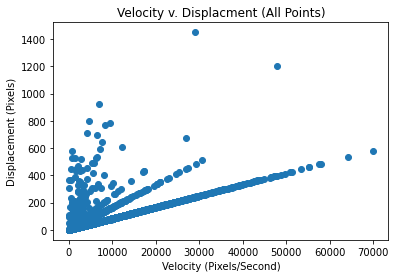

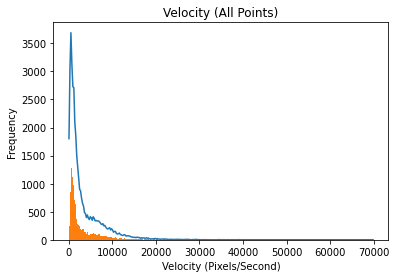

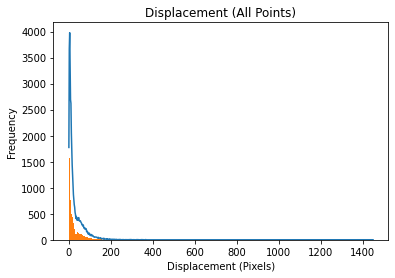

In [7]:
#Velocity

point_velo = []
    
for i in range(len(point_disp)):
        
    point_velo.append(point_disp[i]/(duration_diff[i]))

print(len(point_velo))

#plt.scatter(point_disp,duration_diff)
#plt.xlabel("Displacement")
#plt.ylim(0, 1)
#plt.xlim(0, 3.5)
#plt.ylabel("Duration")
#plt.title("Duration v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

#plt.scatter(point_velo,duration_diff)
#plt.xlabel("Velocity")
#plt.ylim(0, 1)
#plt.xlim(0, 3.5)
#plt.ylabel("Duration")
#plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
#plt.show()

plt.scatter(point_velo,point_disp)
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (All Points)")
#plt.savefig("Fixations_feat_velo")
plt.show()

sb.histplot(point_velo, element = 'poly', fill= False)
plt.hist(point_velo,500,range=[0,30000]) 
plt.title("Velocity (All Points)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.show()

sb.histplot(point_disp, element = 'poly', fill= False)
plt.hist(point_disp,500,range=[0,300])
plt.title("Displacement (All Points)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.show()

<ipython-input-8-ad3b842bc14b>:24: RuntimeWarning: invalid value encountered in true_divide
  unit2 = vec2 / np.linalg.norm(vec2)
<ipython-input-8-ad3b842bc14b>:23: RuntimeWarning: invalid value encountered in true_divide
  unit1 = vec1 / np.linalg.norm(vec1)
<ipython-input-8-ad3b842bc14b>:28: RuntimeWarning: invalid value encountered in arccos
  if (math.isnan(np.arccos(dot_product))):


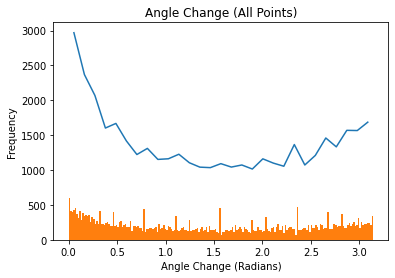

In [8]:
#Angle

theta_np = []

ang_time = []

duration_diff_corr = []

point_velo_corr = []

point_disp_corr = []

f_type_corr = []

x_val_corr = []

y_val_corr = []

for i in range(len(duration_diff)-1):
    vec1 = [x_point_len[i],y_point_len[i]]
    vec2 = [x_point_len[i+1],y_point_len[i+1]]
 
    unit1 = vec1 / np.linalg.norm(vec1)
    unit2 = vec2 / np.linalg.norm(vec2)
    dot_product = np.dot(unit1, unit2)
    #print(np.arccos(dot_product))
    
    if (math.isnan(np.arccos(dot_product))):
        pass
    else:
        theta_np.append(abs(math.pi - np.arccos(dot_product)))
        ang_time.append(t_stamps[i+1])
        duration_diff_corr.append(duration_diff[i])
        point_velo_corr.append(point_velo[i])
        point_disp_corr.append(point_disp[i])
        f_type_corr.append(f_type[i])
        x_val_corr.append(x_val[i+1])
        y_val_corr.append(y_val[i+1])
        
#print(len(theta_np))

#print(len(duration_diff))
#print(len(duration_diff_corr))

sb.histplot(theta_np, element = 'poly', fill= False)
plt.hist(theta_np,200)
plt.title("Angle Change (All Points)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.show()

In [9]:
#AVT Algorithm

point_velo_eff = []

print(point_velo_corr[0])
print(theta_np[0])

print(point_velo_corr[0] * np.cos(theta_np[0]))

for i in range(len(point_velo_corr)):
    point_velo_eff.append(point_velo_corr[i] * np.cos(theta_np[i]))

6816.581766256376
2.4869188253577694
-5407.230149243296


40163
40163
40163
40163
40163


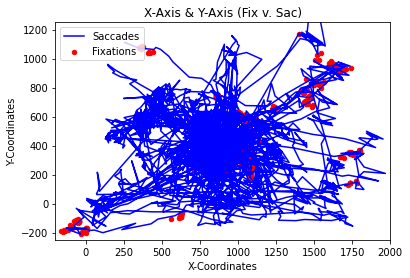

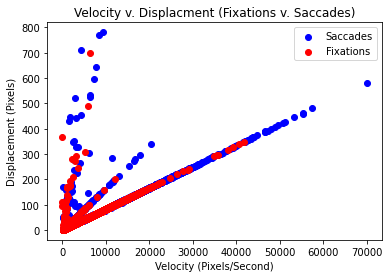

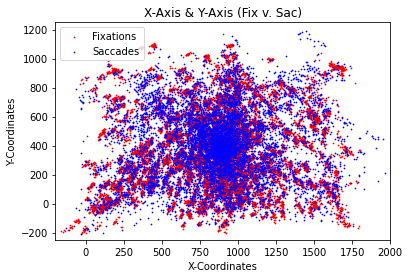

No handles with labels found to put in legend.


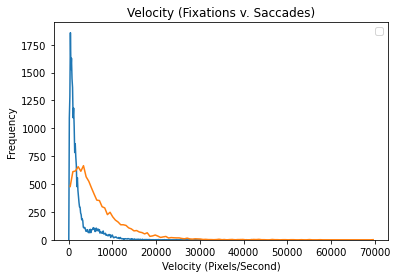

No handles with labels found to put in legend.


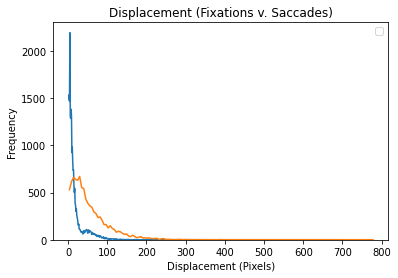

No handles with labels found to put in legend.


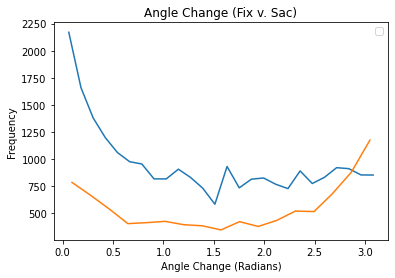

In [10]:
#Eye-Tracker Algorithm

f_type_corr

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

fix_velo_eff = []
sac_velo_eff = []

fix_theta = []
sac_theta = []

classifier = []

outliers = []

for i in range (len(f_type_corr)):
    if f_type_corr[i] == "Fixation":
        x_fix.append(x_val_corr[i])
        y_fix.append(y_val_corr[i])
        fix_timestamp.append(ang_time[i])
        fix_duration.append(duration_diff_corr[i])
        fix_displacement.append(point_disp_corr[i])
        fix_velo.append(point_velo_corr[i])
        fix_theta.append(theta_np[i])
        fix_velo_eff.append(point_velo_eff[i])
        classifier.append("fixation")
        
    elif f_type_corr[i] == "Saccade":
        x_sac.append(x_val_corr[i])
        y_sac.append(y_val_corr[i])
        sac_timestamp.append(ang_time[i])
        sac_duration.append(duration_diff_corr[i])
        sac_displacement.append(point_disp_corr[i])
        sac_velo.append(point_velo_corr[i])
        sac_theta.append(theta_np[i])
        sac_velo_eff.append(point_velo_eff[i])
        classifier.append("saccade")
        
    else:
        classifier.append("outlier")
        
        

print(len(f_type_corr))
print(len(x_val_corr))
print(len(y_val_corr))
print(len(ang_time))
print(len(classifier))

#print(len(x_sac + y_sac))

#print(outliers)
#print(len(outliers))

x_fix_s = []
y_fix_s = []
x_sac_s = []
y_sac_s = []

for j in range(4117):
    x_fix_s.append(x_fix[j])
    y_fix_s.append(y_fix[j])
    x_sac_s.append(x_sac[j])
    y_sac_s.append(y_sac[j])

plt.scatter(x_fix_s,y_fix_s, s=20.0, c="red",label="Fixations")
plt.plot(x_sac_s,y_sac_s, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
plt.savefig("X_y_fix_sac")
plt.show()

plt.scatter(sac_velo,sac_displacement, c="blue",label="Saccades")
plt.scatter(fix_velo,fix_displacement, c="red",label="Fixations")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
#plt.ylim(0, 400000)
#plt.xlim(0, 3.5)
plt.title("Velocity v. Displacment (Fixations v. Saccades)")
plt.savefig("Fixations_saccades_velo_disp")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

sb.histplot(fix_velo, element = 'poly', fill= False)
sb.histplot(sac_velo, element = 'poly', fill= False)
#plt.hist(fix_velo,100,range=[0,30000], color ="red",label="Fixations")
#plt.hist(sac_velo,100,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fixations v. Saccades)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.savefig("Fixations_saccades_velo_hist")
plt.show()

sb.histplot(fix_displacement, element = 'poly', fill= False)
sb.histplot(sac_displacement, element = 'poly', fill= False)
#plt.hist(fix_displacement,100,range=[0,300], color ="red",label="Fixations")
#plt.hist(sac_displacement,100,range=[0,300], color ="blue",label="Saccades")
plt.legend()
plt.title("Displacement (Fixations v. Saccades)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.savefig("Fixations_saccades_disp_hist")
plt.show()

sb.histplot(fix_theta, element = 'poly', fill= False)
sb.histplot(sac_theta, element = 'poly', fill= False)
#plt.hist(fix_theta,100, color ="red",label="Fixations")
#plt.hist(sac_theta,100, color ="blue",label="Saccades")
plt.legend()
plt.title("Angle Change (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.savefig("Fix_v_sac_angle_hist")
plt.show()

#plt.hist(fix_velo_eff,100,range=[-25000,25000],color ="red",label="Fixations")
#plt.legend()
#plt.title("Velocity-Angle Change (Fix)")
#plt.xlabel("Velocity-Angle Change (Radians)")
#plt.ylabel("Frequency")
#plt.savefig("Fix_vel_angle_hist")
#plt.show()

#plt.hist(sac_velo_eff,100,range=[-25000,25000],color ="blue",label="Saccades")
#plt.legend()
#plt.title("Velocity-Angle Change (Sac)")
#plt.xlabel("Velocity-Angle Change (Radians)")
#plt.ylabel("Frequency")
#plt.savefig("Sac_vel_angle_hist")
#plt.show()

In [11]:
np.savetxt('x_values.txt', np.array(x_val_corr), fmt='%.2f')
np.savetxt('y_values.txt', np.array(y_val_corr), fmt='%.2f')
np.savetxt('timestamps.txt', np.array(ang_time), fmt='%.2f')
#np.savetxt('eyetracker.txt', np.array(x_val_corr), fmt='%.2f')

textfile = open("eyetracker.txt", "w")
for element in classifier:
    textfile.write(element + "\n")
textfile.close()

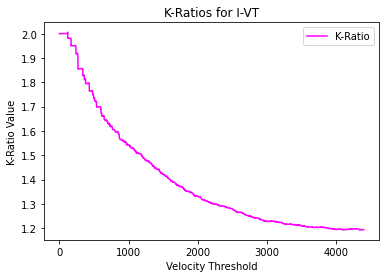


80.0357015132904
1.193078185088146
4368


In [22]:
#K-Ratio (I-VT)

import time

start = time.time()

k_ratios = []
v_thres = []

for i in range(4400):
    
    sac_timestamp = []

    classifier = []

    velocity_threshold = i + 1
    
    #i-vt
    
    for k in range (len(point_velo_corr)):
        if point_velo_corr[k] >= 0 and point_velo_corr[k] < velocity_threshold:
            classifier.append("fixation")
        
        elif point_velo_corr[k] >= velocity_threshold:
            sac_timestamp.append("0")
            classifier.append("saccade")
        
        else:
            classifier.append("outlier")
    
    #print(len(classifier))
    #print(len(sac_timestamp))
    
    #k-ratio
    # P is the probability of being a saccade state

    P = len(sac_timestamp)/len(classifier)

    #print(P)

    # N*(P)*(1-P)

    p_ind = len(classifier)*(P)*(1-P)

    # p_ind = (P)*(1-P)          (paper formula)

    #print(p_ind)

    #number of transitions

    p_emp = 0

    for j in range (len(classifier)-1):
        if (classifier[j] != classifier[j+1]):
            p_emp = p_emp + 1
        else:
            pass

    #print(p_emp) 

    #k-ratio

    k_ratio = p_emp / p_ind
    
    #print(k_ratio)   
    
    k_ratios.append(k_ratio)
    v_thres.append(i + 1)

plt.plot(v_thres,k_ratios, c="magenta",label="K-Ratio")
plt.legend()
plt.ylabel("K-Ratio Value")
#plt.ylim(-250, 1250)
#plt.xlim(-200, 2000)
plt.xlabel("Velocity Threshold")
plt.title("K-Ratios for I-VT")
plt.savefig("k_rat_ivt")
plt.show()


end = time.time()
total_time = end - start
print("\n"+ str(total_time))

low = 2.0
thres = 0
for m in range(len(k_ratios)):
   if low > k_ratios[m]:
    low = k_ratios[m]
    thres = v_thres[m]
    
print(low)
print(thres)

In [23]:
print(p_emp)

9298


40163
40163
40163
40163
[]
0
29557


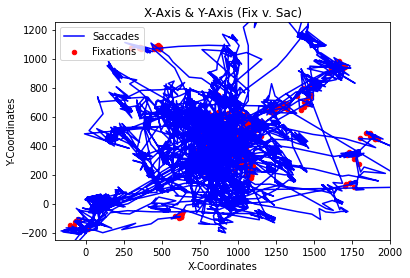

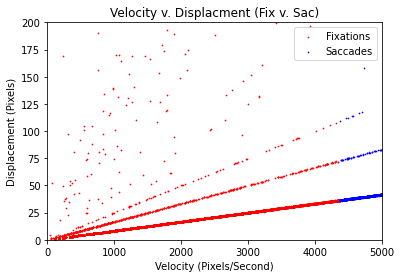

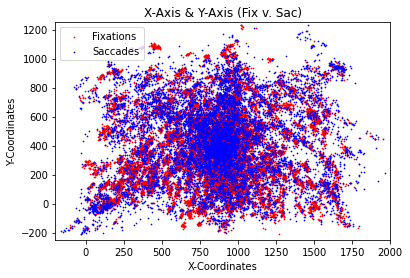

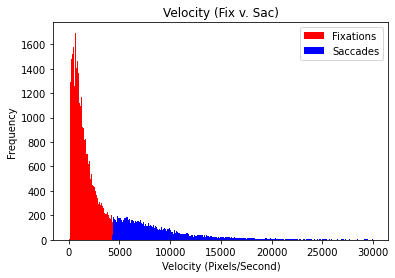

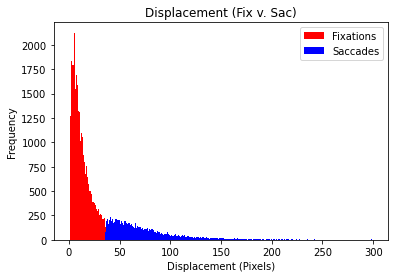

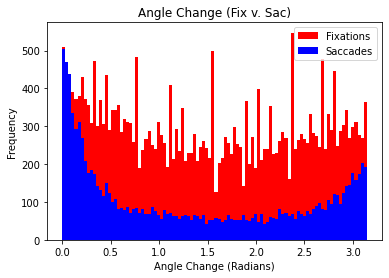

In [36]:
#I-VT

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

fix_theta = []
sac_theta = []

classifier = []

outliers = []

velocity_threshold = 4368

for i in range (len(point_velo_corr)):
    if point_velo_corr[i] >= 0 and point_velo_corr[i] < velocity_threshold:
        x_fix.append(x_val_corr[i])
        y_fix.append(y_val_corr[i])
        fix_timestamp.append(ang_time[i])
        fix_duration.append(duration_diff_corr[i])
        fix_displacement.append(point_disp_corr[i])
        fix_velo.append(point_velo_corr[i])
        fix_theta.append(theta_np[i])
        classifier.append("fixation")
        
    elif point_velo_corr[i] >= velocity_threshold:
        x_sac.append(x_val_corr[i])
        y_sac.append(y_val_corr[i])
        sac_timestamp.append(ang_time[i])
        sac_duration.append(duration_diff_corr[i])
        sac_displacement.append(point_disp_corr[i])
        sac_velo.append(point_velo_corr[i])
        sac_theta.append(theta_np[i])
        classifier.append("saccade")
        
    else:
        classifier.append("outlier")


print(len(x_val_corr))
print(len(y_val_corr))
print(len(ang_time))
print(len(classifier))

#print(len(x_sac + y_sac))

print(outliers)
print(len(outliers))

#print(classifier)

print(len(x_fix))

x_fix_s = []
y_fix_s = []
x_sac_s = []
y_sac_s = []

for j in range(4117):
    x_fix_s.append(x_fix[j])
    y_fix_s.append(y_fix[j])
    x_sac_s.append(x_sac[j])
    y_sac_s.append(y_sac[j])
    
plt.scatter(x_fix_s,y_fix_s, s=20.0, c="red",label="Fixations")
plt.plot(x_sac_s,y_sac_s, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
plt.savefig("X_y_fix_sac_ivt")
plt.show()

plt.scatter(fix_velo,fix_displacement, s=0.5, c="red",label="Fixations")
plt.scatter(sac_velo,sac_displacement, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
plt.ylim(0, 200)
plt.xlim(0, 5000)
plt.title("Velocity v. Displacment (Fix v. Sac)")
plt.savefig("Fix_sac_velo_ivt")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(fix_velo,300,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,300,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fix v. Sac)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_vel_hist")
plt.show()

plt.hist(fix_displacement,300,range=[0,300], color ="red",label="Fixations")
plt.hist(sac_displacement,300,range=[0,300], color ="blue",label="Saccades")
plt.legend()
plt.title("Displacement (Fix v. Sac)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_disp_hist")
plt.show()

plt.hist(fix_theta,100, color ="red",label="Fixations")
plt.hist(sac_theta,100, color ="blue",label="Saccades")
plt.legend()
plt.title("Angle Change (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_theta_hist")
plt.show()

textfile = open("ivt.txt", "w")
for element in classifier:
    textfile.write(element + "\n")
textfile.close()

40163
40163
v: 1133.839247102325
a: 0.2662520491509248
v: 434.56083831071345
a: 2.746801533890032
v: 432.83928877118694
a: 2.210700328800637
v: 9245.063082110888
a: 0.3007336070573201
v: 15094.966304961428
a: 0.14673894214365824


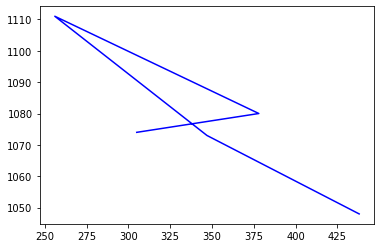

In [13]:
print(len(point_velo_corr))
print(len(theta_np))

x_fixs = []
y_fixs = []

for i in range(5):
    x_fixs.append(x_sac[i])
    y_fixs.append(y_sac[i])
    print("v: " + str(point_velo_corr[i+1]))
    print("a: " + str(theta_np[i+1]))
    
plt.plot(x_fixs,y_fixs, c="blue",label="Saccades")

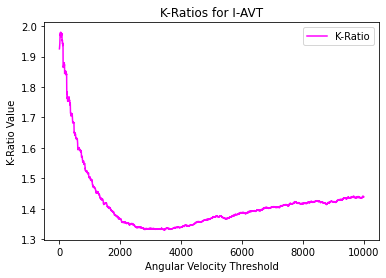

Compile Time: 159.35814452171326Seconds
1.330185943056405
3462


In [18]:
#K-Ratio (I-AVT)

import time

start = time.time()

k_ratios = []
v_thres = []

for i in range(10000):
    
    sac_timestamp = []

    classifier = []

    angle_velocity_threshold = i + 1

    for k in range (len(point_velo_eff)):
        if point_velo_eff[k] >= -(angle_velocity_threshold) and point_velo_eff[k] < angle_velocity_threshold:
            classifier.append("fixation")
        
        else:
            sac_timestamp.append("0")
            classifier.append("saccade")
    
    #print(len(classifier))
    #print(len(sac_timestamp))
    
    #k-ratio
    # P is the probability of being a saccade state

    P = len(sac_timestamp)/len(classifier)

    #print(P)

    # N*(P)*(1-P)

    p_ind = len(classifier)*(P)*(1-P)

    # p_ind = (P)*(1-P)          (paper formula)

    #print(p_ind)

    #number of transitions

    p_emp = 0

    for j in range (len(classifier)-1):
        if (classifier[j] != classifier[j+1]):
            p_emp = p_emp + 1
        else:
            pass

    #print(p_emp) 

    #k-ratio

    k_ratio = p_emp / p_ind
    
    #print(k_ratio)   
    
    k_ratios.append(k_ratio)
    v_thres.append(i + 1)

plt.plot(v_thres,k_ratios, c="magenta",label="K-Ratio")
plt.legend()
plt.ylabel("K-Ratio Value")
#plt.ylim(-250, 1250)
#plt.xlim(-200, 2000)
plt.xlabel("Angular Velocity Threshold")
plt.title("K-Ratios for I-AVT")
plt.savefig("k_rat_iavt")
plt.show()


end = time.time()
total_time = end - start
print("Compile Time: "+ str(total_time) + "Seconds")


low = 2.0
thres = 0
for m in range(len(k_ratios)):
   if low > k_ratios[m]:
    low = k_ratios[m]
    thres = v_thres[m]
    
print(low)
print(thres)

40163
40163
40163
40163
[]
0
30624


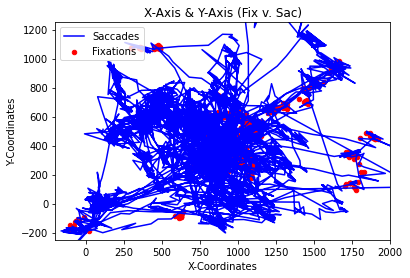

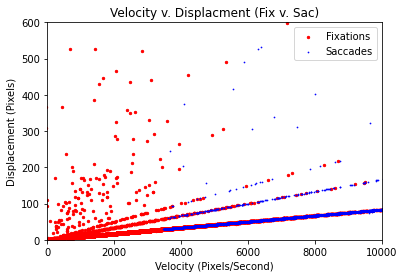

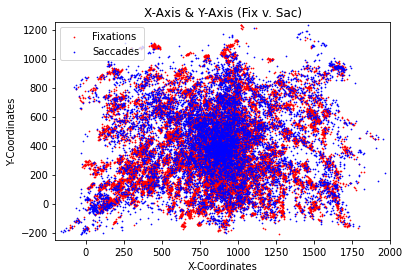

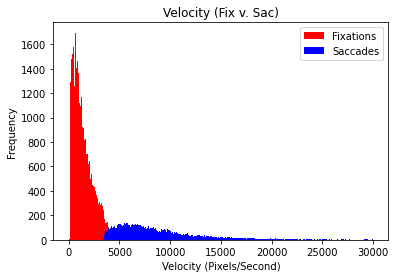

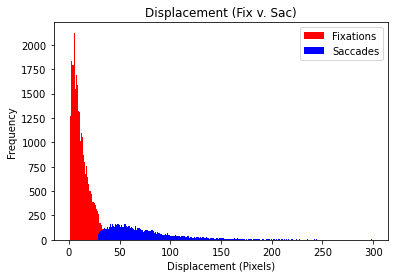

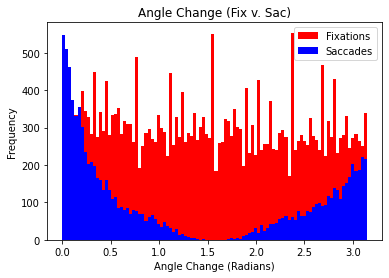

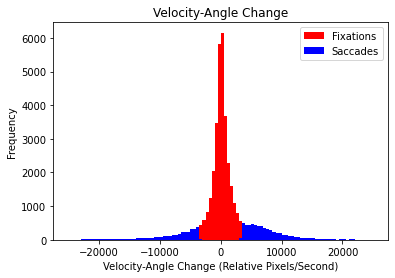

In [19]:
#I-AVT (Angular Velocity Threshold)

x_fix = []
y_fix = []

x_sac = []
y_sac = []

fix_timestamp = []
sac_timestamp = []

fix_duration = []
sac_duration = []

fix_displacement = []
sac_displacement = []

fix_velo = []
sac_velo = []

fix_velo_eff = []
sac_velo_eff = []

fix_theta = []
sac_theta = []

classifier = []

outliers = []

angle_velocity_threshold = 3462

for i in range (len(point_velo_eff)):
    if point_velo_eff[i] >= -(angle_velocity_threshold) and point_velo_eff[i] < angle_velocity_threshold:
        x_fix.append(x_val_corr[i])
        y_fix.append(y_val_corr[i])
        fix_timestamp.append(ang_time[i])
        fix_duration.append(duration_diff_corr[i])
        fix_displacement.append(point_disp_corr[i])
        fix_velo.append(point_velo_corr[i])
        fix_theta.append(theta_np[i])
        fix_velo_eff.append(point_velo_eff[i])
        classifier.append("fixation")
        
    else:
        x_sac.append(x_val_corr[i])
        y_sac.append(y_val_corr[i])
        sac_timestamp.append(ang_time[i])
        sac_duration.append(duration_diff_corr[i])
        sac_displacement.append(point_disp_corr[i])
        sac_velo.append(point_velo_corr[i])
        sac_theta.append(theta_np[i])
        sac_velo_eff.append(point_velo_eff[i])
        classifier.append("saccade")
        


print(len(x_val_corr))
print(len(y_val_corr))
print(len(ang_time))
print(len(classifier))

#print(len(x_sac + y_sac))

print(outliers)
print(len(outliers))

#print(classifier)

print(len(x_fix))

x_fix_s = []
y_fix_s = []
x_sac_s = []
y_sac_s = []

for j in range(4117):
    x_fix_s.append(x_fix[j])
    y_fix_s.append(y_fix[j])
    x_sac_s.append(x_sac[j])
    y_sac_s.append(y_sac[j])
    
plt.scatter(x_fix_s,y_fix_s, s=20.0, c="red",label="Fixations")
plt.plot(x_sac_s,y_sac_s, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
plt.savefig("X_y_fix_sac_iavt")
plt.show()

plt.scatter(fix_velo,fix_displacement, s=5.5, c="red",label="Fixations")
plt.scatter(sac_velo,sac_displacement, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Displacement (Pixels)")
plt.ylim(0, 600)
plt.xlim(0, 10000)
plt.title("Velocity v. Displacment (Fix v. Sac)")
plt.savefig("Fix_sac_velo_iavt")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
#plt.savefig("Fixations_feat_velo")
plt.show()

plt.hist(fix_velo,300,range=[0,30000], color ="red",label="Fixations")
plt.hist(sac_velo,300,range=[0,30000], color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity (Fix v. Sac)")
plt.xlabel("Velocity (Pixels/Second)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_vel_hist")
plt.show()

plt.hist(fix_displacement,300,range=[0,300], color ="red",label="Fixations")
plt.hist(sac_displacement,300,range=[0,300], color ="blue",label="Saccades")
plt.legend()
plt.title("Displacement (Fix v. Sac)")
plt.xlabel("Displacement (Pixels)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_disp_hist")
plt.show()

plt.hist(fix_theta,100, color ="red",label="Fixations")
plt.hist(sac_theta,100, color ="blue",label="Saccades")
plt.legend()
plt.title("Angle Change (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_theta_hist")
plt.show()

plt.hist(fix_velo_eff,100,range=[-25000,25000],color ="red",label="Fixations")
plt.hist(sac_velo_eff,100,range=[-25000,25000],color ="blue",label="Saccades")
plt.legend()
plt.title("Velocity-Angle Change")
plt.xlabel("Velocity-Angle Change (Relative Pixels/Second)")
plt.ylabel("Frequency")
plt.savefig("Vel_angle_hist")
plt.show()

textfile = open("iavt.txt", "w")
for element in classifier:
    textfile.write(element + "\n")
textfile.close()

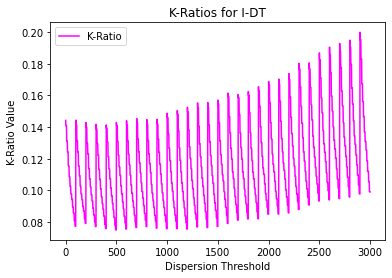

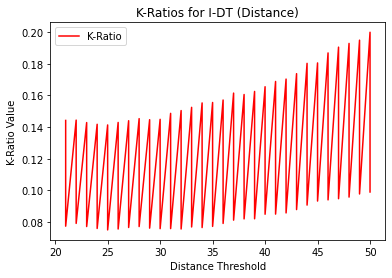

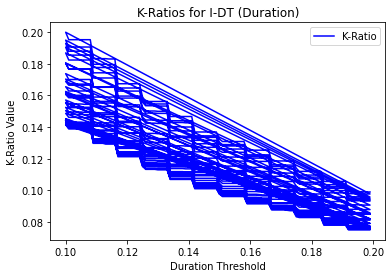


355.96748185157776 Seconds

0.0750378580399017
493
25
0.192


In [47]:
#I-DT (K-Ratio)

import time

start = time.time()

k_ratios = []
v_thres = []
dist_thres = []
duration_Threshold = []


num = 0

for o in range(30):
    for q in range(100):    

        x_temp_fix = []
        y_temp_fix = []

        fix_temp_timestamp = []

        fix_timestamp = []
        sac_timestamp = []

        classifier = []
    
        dist = 0

        x_comp = []
        y_comp = []

        s_point = 0 

        for i in range (len(x_val_corr)):
    
            x_thres = 20 + (o + 1)
            y_thres = 20 + (o + 1)
            dur_thres = 0.1 + (q * 0.001)
    
            startX = x_val_corr[s_point] 
            startY = y_val_corr[s_point] 
            startTime = ang_time[s_point]
    
            endX = x_val_corr[i] 
            endY = y_val_corr[i] 
            endTime = ang_time[i]
    
            x_diff = abs(endX - startX)
            y_diff = abs(endY - startY)
            dur_diff = endTime - startTime
            x_comp.append(abs(x_val_corr[i] - x_val_corr[i-1]))
            y_comp.append(abs(y_val_corr[i] - y_val_corr[i-1]))
        
    
            if i == len(x_val_corr)-1: 
            
                for m in range(len(x_temp_fix)):
                    sac_timestamp.append(fix_temp_timestamp[m])
                    classifier.append("saccade")
    
    
            elif(x_diff < x_thres and y_diff < y_thres): 
            
                if(dur_diff > dur_thres): 
                    x_temp_fix.append(x_val_corr[i])
                    y_temp_fix.append(y_val_corr[i])
                    fix_temp_timestamp.append(ang_time[i])
                    fix_dur = dur_diff
                    dist = dist + np.sqrt(x_comp[i]**2 + y_comp[i]**2)

                
                else: 
                    x_temp_fix.append(x_val_corr[i])
                    y_temp_fix.append(y_val_corr[i])
                    fix_temp_timestamp.append(ang_time[i])
                    fix_dur = dur_diff
                    dist = dist + np.sqrt(x_comp[i]**2 + y_comp[i]**2)
                    pass
            
            else: 
            
                if(dur_diff > dur_thres): 
                
                    for j in range(len(x_temp_fix)): 
                        fix_timestamp.append(fix_temp_timestamp[j])
                        classifier.append("fixation")
            
                    sac_timestamp.append(ang_time[i])
                    classifier.append("saccade")
            
                    dist = 0
                    x_temp_fix = []
                    y_temp_fix = []
                    fix_temp_timestamp = []
                    s_point = i+1
        
                elif i == len(x_val_corr): 
            
                    for m in range(len(x_temp_fix)):
                        sac_timestamp.append(fix_temp_timestamp[m])
                        classifier.append("saccade")
            
                    sac_timestamp.append(ang_time[i])
                    classifier.append("saccade")
        
                else: 
                
                    for l in range(len(x_temp_fix)): 
                        sac_timestamp.append(fix_temp_timestamp[l])
                        classifier.append("saccade")
            
                    sac_timestamp.append(ang_time[i])
                    classifier.append("saccade")
    
                    dist = 0
                    x_temp_fix = []
                    y_temp_fix = []
                    fix_temp_timestamp = []
                    s_point = i+1
        
    

        P = len(sac_timestamp)/len(classifier)

        p_ind = len(classifier)*(P)*(1-P)

        # p_ind = (P)*(1-P)

        p_emp = 0

        for r in range (len(classifier)-1):
            if (classifier[r] != classifier[r+1]):
                p_emp = p_emp + 1
            else:
                pass


        k_ratio = p_emp / p_ind
              
        num = num + 1
        
        stop = q
        
        dist_thres.append(x_thres)
        duration_Threshold.append(dur_thres) 
        
        k_ratios.append(k_ratio)
        v_thres.append(num)

plt.plot(v_thres,k_ratios, c="magenta",label="K-Ratio")
plt.legend()
plt.ylabel("K-Ratio Value")
plt.xlabel("Dispersion Threshold")
plt.title("K-Ratios for I-DT")
plt.savefig("k_rat_idt")
plt.show()

plt.plot(dist_thres,k_ratios, c="red",label="K-Ratio")
plt.legend()
plt.ylabel("K-Ratio Value")
plt.xlabel("Distance Threshold")
plt.title("K-Ratios for I-DT (Distance)")
plt.savefig("k_rat_idt_dis")
plt.show()

plt.plot(duration_Threshold,k_ratios, c="blue",label="K-Ratio")
plt.legend()
plt.ylabel("K-Ratio Value")
plt.xlabel("Duration Threshold")
plt.title("K-Ratios for I-DT (Duration)")
plt.savefig("k_rat_idt_dur")
plt.show()


end = time.time()
total_time = end - start
print("\n"+ str(total_time) + " Seconds" + "\n")


low = 2.0
thres = 0
for m in range(len(k_ratios)):
   if low > k_ratios[m]:
    low = k_ratios[m]
    thres = v_thres[m]
    dist = dist_thres[m]
    dur = duration_Threshold[m]
    
    
print(low)
print(thres)
print(dist)
print(dur)

In [79]:
print(stop)
print(len(v_thres))
print(len(sac_timestamp))
print(len(classifier))
print(P)

74
75
40162
40162
1.0


In [53]:
print(k_ratios)
print(v_thres)

[3.9987052536790393, 2.028902196455294, 1.9969675090859673, 2.0045419380599445, 2.004091816367258, 2.003392028732439, 2.003042318146692, 2.002942423260048, 2.0027426633754217, 2.002393179438615, 2.0017943478044935, 2.0013454590756967, 2.0012955949770785, 2.0012457333631493, 2.001096163428034, 2.0007472538424054, 2.0006475877356853, 2.0006475877356853, 2.0004981071929433, 2.0004482853087713, 2.0004482853087713, 2.0003984659060903, 2.0003984659060903, 2.0003984659060903, 2.0003984659060903, 3.933449060435354, 1.441390749689277, 1.6578536806431303, 1.6953679880764907, 1.822674741827065, 2.003741861451381, 2.0034919684725336, 2.003342062601384, 2.003142222998015, 2.0027426633754217, 2.002293349286994, 2.0016945773524326, 2.0016446958557617, 2.0013454590756967, 2.0011958742337224, 2.0008967716222372, 2.000797090619069, 2.0007472538424054, 2.0006475877356853, 2.000597758405807, 2.0004981071929433, 2.0003984659060903, 2.0003984659060903, 2.0003984659060903, 2.0003984659060903, 3.8421405767954

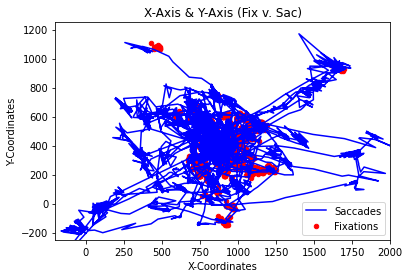

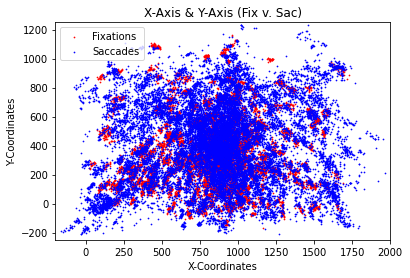

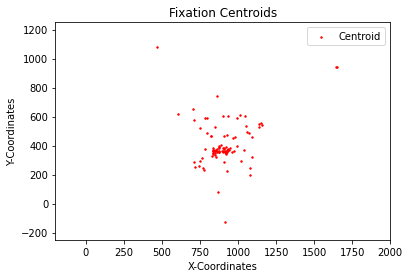

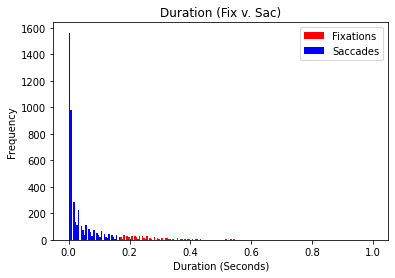

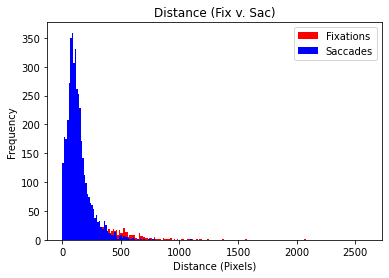

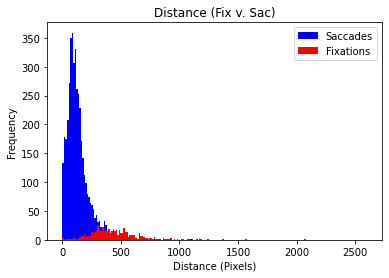

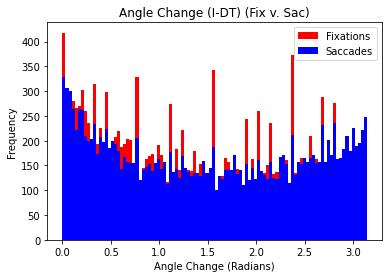

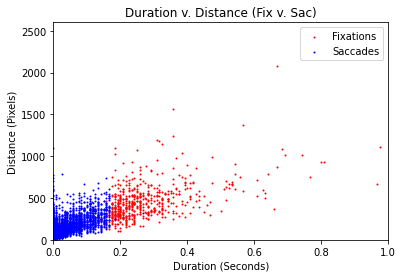

In [56]:
#I-DT

#Less relevant classifications up here

#angle

#debug
t_stamps_debug = []

#angle

fix_temp_theta = []
sac_temp_theta = []

fix_theta = []
sac_theta = []
fix_theta.append(theta_np[i])
sac_theta.append(theta_np[i])

#Temporary fixation and saccade x/y points
x_temp_fix = []
y_temp_fix = []

#Classified fixation and saccade x/y points
x_fix = []
y_fix = []

x_sac = []
y_sac = []

#Temporary fixation timestamp
fix_temp_timestamp = []

#Classified fixation and saccade timestamps
fix_timestamp = []
sac_timestamp = []

#Fixation and saccade classifier
classifier = []

#Temporary X/Y centroid points
x_temp_centroid = []
y_temp_centroid = []

#Cumulated X/Y centroid values
x_centroid_val = 0
y_centroid_val = 0

#pre_classification_count = 0

#Calculated X/Y centroid points for classified fixations
x_centroid = []
y_centroid = []

#duration for each classified fixation
fixation_duration = []
fixation_distance = []

#comparisson
saccade_duration = []
saccade_distance = []

dist = 0

x_comp = []
y_comp = []

s_point = 0 #Start point for new dispersion window

for i in range (len(x_val_corr)):
    
    x_thres = 50
    y_thres = 50
    dur_thres = 0.175
    
    startX = x_val_corr[s_point] 
    startY = y_val_corr[s_point] 
    startTime = ang_time[s_point]
    
    endX = x_val_corr[i] 
    endY = y_val_corr[i] 
    endTime = ang_time[i]
    
    #absolute X/Y distances from start point
    x_diff = abs(endX - startX)
    y_diff = abs(endY - startY)
    dur_diff = endTime - startTime
    x_comp.append(abs(x_val_corr[i] - x_val_corr[i-1]))
    y_comp.append(abs(y_val_corr[i] - y_val_corr[i-1]))
        
    
    
    if i == len(x_val_corr)-1: #Last point, classify all in temp series as saccades
            
        for m in range(len(x_temp_fix)):
            x_sac.append(x_temp_fix[m])
            y_sac.append(y_temp_fix[m])
            sac_timestamp.append(fix_temp_timestamp[m])
            classifier.append("saccade")
            sac_theta.append(fix_temp_theta[m])
            #debug
            #print(classifier[l])
            #print(t_stamps[l])
            t_stamps_debug.append(fix_temp_timestamp[m])
    
    
    elif(x_diff < x_thres and y_diff < y_thres): #Does it meet proximity?
            
        if(dur_diff > dur_thres): #Does it meet duration? Classify as fixation
            x_temp_fix.append(x_val_corr[i])
            y_temp_fix.append(y_val_corr[i])
            fix_temp_timestamp.append(ang_time[i])
            x_temp_centroid.append(x_val_corr[i])
            y_temp_centroid.append(y_val_corr[i])
            fix_temp_theta.append(theta_np[i])
            #classifier.append("fixation")
            fix_dur = dur_diff
            dist = dist + np.sqrt(x_comp[i]**2 + y_comp[i]**2)

                
        else: #Put points "on hold" for either future fixation or saccade classification
            #pre_classification_count = pre_classification_count + 1
            x_temp_fix.append(x_val_corr[i])
            y_temp_fix.append(y_val_corr[i])
            fix_temp_timestamp.append(ang_time[i])
            x_temp_centroid.append(x_val_corr[i])
            y_temp_centroid.append(y_val_corr[i])
            fix_temp_theta.append(theta_np[i])
            fix_dur = dur_diff
            dist = dist + np.sqrt(x_comp[i]**2 + y_comp[i]**2)
            pass
            
    else: 
            
        if(dur_diff > dur_thres): #Compute centriod for previous points, reset temp params
                
            for j in range(len(x_temp_fix)): #Put "pending" fixations into fixation classification
                x_fix.append(x_temp_fix[j])
                y_fix.append(y_temp_fix[j])
                fix_timestamp.append(fix_temp_timestamp[j])
                fix_theta.append(fix_temp_theta[j])
                classifier.append("fixation")
                #debug
                #print(classifier[j])
                #print(t_stamps[j])
                t_stamps_debug.append(fix_temp_timestamp[j])
                
                
            for k in range(len(x_temp_centroid)): #Calculating centriod
                x_centroid_val = x_centroid_val + x_temp_centroid[k]
                y_centroid_val = y_centroid_val + y_temp_centroid[k]
            
            #add X/Y centroid values + duration for that fixation into respective arrays
            x_centroid.append(x_centroid_val/len(x_temp_centroid))    
            y_centroid.append(y_centroid_val/len(x_temp_centroid))
            fixation_duration.append(fix_dur)
            fixation_distance.append(dist)
            
            x_sac.append(x_val_corr[i])
            y_sac.append(y_val_corr[i])
            sac_timestamp.append(ang_time[i])
            classifier.append("saccade")
            
            dist = 0
            x_temp_fix = []
            y_temp_fix = []
            x_temp_centroid = []
            y_temp_centroid = [] 
            fix_temp_timestamp = []
            fix_temp_theta = []
            #pre_classification_count = 0
            x_centroid_val = 0
            y_centroid_val = 0
            s_point = i+1
        
        elif i == len(x_val_corr): #Last point, classify all in temp series as saccades
            
            for m in range(len(x_temp_fix)):
                x_sac.append(x_temp_fix[m])
                y_sac.append(y_temp_fix[m])
                sac_timestamp.append(fix_temp_timestamp[m])
                classifier.append("saccade")
                sac_theta.append(fix_temp_theta[m])
                #debug
                #print(classifier[l])
                #print(t_stamps[l])
                t_stamps_debug.append(fix_temp_timestamp[m])
            
            saccade_duration.append(fix_dur)
            x_sac.append(x_val_corr[i])
            y_sac.append(y_val_corr[i])
            sac_timestamp.append(ang_time[i])
            classifier.append("saccade")
            saccade_distance.append(dist)
        
        else: #Classify previous points as saccade
                
            for l in range(len(x_temp_fix)): #Put "pending" fixations into saccade classification
                x_sac.append(x_temp_fix[l])
                y_sac.append(y_temp_fix[l])
                sac_timestamp.append(fix_temp_timestamp[l])
                classifier.append("saccade")
                sac_theta.append(fix_temp_theta[l])
                #debug
                #print(classifier[l])
                #print(t_stamps[l])
                t_stamps_debug.append(fix_temp_timestamp[l])
            
            saccade_duration.append(fix_dur)
            x_sac.append(x_val_corr[i])
            y_sac.append(y_val_corr[i])
            sac_timestamp.append(ang_time[i])
            classifier.append("saccade")
            saccade_distance.append(dist)
            
            dist = 0
            x_temp_fix = []
            y_temp_fix = []
            x_temp_centroid = []
            y_temp_centroid = []
            fix_temp_timestamp = []
            fix_temp_theta = []
            #pre_classification_count = 0
            x_centroid_val = 0
            y_centroid_val = 0
            s_point = i+1
        
        #debug
        #print(classifier[i])
        #print(t_stamps[i])
        t_stamps_debug.append(ang_time[i])
    

    
#Define start/end durations
#Define X & Y Proximity

#When out of range, classify exisitng points as fixations if dispersion & duration threshold are met
    #if not, the next point (from the original centroid) is the new starting point, previous point classified as a saccade
    
#Compute centroids

#print(len())
#print(len(x_val_corr))
#print(len(classifier))
#print(len(x_fix))
#print(len(x_sac))
#print(len(x_centroid))
#print(len(t_stamps_debug))


x_fix_s = []
y_fix_s = []
x_sac_s = []
y_sac_s = []

for j in range(4117):
    x_fix_s.append(x_fix[j])
    y_fix_s.append(y_fix[j])
    x_sac_s.append(x_sac[j])
    y_sac_s.append(y_sac[j])
    
x_centroid_s = []
y_centroid_s = []
    
for k in range(94):
    x_centroid_s.append(x_centroid[k])
    y_centroid_s.append(y_centroid[k])
    
plt.scatter(x_fix_s,y_fix_s, s=20.0, c="red",label="Fixations")
plt.plot(x_sac_s,y_sac_s, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
plt.savefig("X_y_fix_sac_idt")
plt.show()

plt.scatter(x_fix,y_fix, s=0.5, c="red",label="Fixations")
plt.scatter(x_sac,y_sac, s=0.5, c="blue",label="Saccades")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("X-Axis & Y-Axis (Fix v. Sac)")
plt.savefig("X_y_fix_sac_comp")
plt.show()

plt.scatter(x_centroid_s,y_centroid_s, s=2.0, c="red",label="Centroid")
plt.legend()
plt.ylabel("Y-Coordinates")
plt.ylim(-250, 1250)
plt.xlim(-200, 2000)
plt.xlabel("X-Coordinates")
plt.title("Fixation Centroids")
plt.savefig("Fix_centroids")
plt.show()

plt.hist(fixation_duration,200,range=[0,1], color ="red",label="Fixations")
plt.hist(saccade_duration,200,range=[0,1], color ="blue",label="Saccades")
plt.legend()
plt.title("Duration (Fix v. Sac)")
plt.xlabel("Duration (Seconds)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_dur_hist")
plt.show()

plt.hist(fixation_distance,200,range=[0,2600], color ="red",label="Fixations")
plt.hist(saccade_distance,200,range=[0,2600], color ="blue",label="Saccades")
plt.legend()
plt.title("Distance (Fix v. Sac)")
plt.xlabel("Distance (Pixels)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_dist_hist")
plt.show()

plt.hist(saccade_distance,200,range=[0,2600], color ="blue",label="Saccades")
plt.hist(fixation_distance,200,range=[0,2600], color ="red",label="Fixations")
plt.legend()
plt.title("Distance (Fix v. Sac)")
plt.xlabel("Distance (Pixels)")
plt.ylabel("Frequency")
plt.savefig("Sac_fix_dist_hist")
plt.show()

plt.hist(fix_theta,100, color ="red",label="Fixations")
plt.hist(sac_theta,100, color ="blue",label="Saccades")
plt.legend()
plt.title("Angle Change (I-DT) (Fix v. Sac)")
plt.xlabel("Angle Change (Radians)")
plt.ylabel("Frequency")
plt.savefig("Fix_sac_idt_theta_hist")
plt.show()

plt.scatter(fixation_duration,fixation_distance, s=1.0, c="red",label="Fixations")
plt.scatter(saccade_duration,saccade_distance, s=1.0, c="blue",label="Saccades")
plt.legend()
plt.xlabel("Duration (Seconds)")
plt.ylabel("Distance (Pixels)")
plt.ylim(0, 2600)
plt.xlim(0, 1)
plt.title("Duration v. Distance (Fix v. Sac)")
plt.savefig("Fix_sac_dur_dist_idt")
plt.show()

np.savetxt('timestamps_debug.txt', np.array(t_stamps_debug), fmt='%.2f')
#np.savetxt('eyetracker.txt', np.array(x_val_corr), fmt='%.2f')

textfile = open("idt.txt", "w")
for element in classifier:
    textfile.write(element + "\n")
textfile.close()
    





In [15]:
#I-HMM (https://stackoverflow.com/questions/44812681/hidden-markov-model-gets-stuck-python-hiiden-markov-model-for-eye-movement-det)

from pomegranate import *

def Average(lst):
    return sum(lst) / len(lst)

meanVelocity = Average(point_velo_corr)

fixations_ = []
fixations_time = []

saccades_ = []
saccades_time = []

for i in range(len(point_velo_corr)):
    
    if point_velo_corr[i] < meanVelocity: #fixation
        fixations_.append(point_velo_corr[i])
        fixations_time.append(duration_diff_corr[i])
    else: #saccade
        saccades_.append(point_velo_corr[i])
        saccades_time.append(duration_diff_corr[i])



#Initialize model

#model = Model(name="Saccade-Fixation")
saccade = State(DiscreteDistribution(dict(zip(saccades_time, saccades_))), name="saccades")
fixation = State(DiscreteDistribution(dict(zip(fixations_time, fixations_))), name="fixations")

#Add states to the model.
model = HiddenMarkovModel()
model.add_states(fixation, saccade)

#Add the two transitions from the start of of the model to the hidden states.
model.add_transition(model.start, saccade, 0.5)
model.add_transition(model.start, fixation, 0.5)
model.bake()
sequence = model.sample()

UnboundLocalError: local variable 'dist' referenced before assignment

In [ ]:
#I-HMM (Pomogranite Tutorial)

from pomegranate import *

d = NormalDistribution(point_velo_corr)

s1 = State(d, name='fixation')
s2 = State(d, name='saccade')

s3 = State( NormalDistribution(point_velo_corr), name="untied_fixation" )
s4 = State( NormalDistribution(point_velo_corr), name="untied_saccade" )

model = HiddenMarkovModel()
model.add_states( [s1, s2] )
model.add_transition( model.start, s1, 0.5, group='a' )
model.add_transition( model.start, s2, 0.5, group='b' )
model.add_transition( s1, s2, 0.5, group='a' )
model.add_transition( s2, s1, 0.5, group='b' )
model.bake()

sequence = model.sample()

In [57]:
#Hamming Distance

results = pd.read_csv("text_results/results2.csv")

original2 = results.iloc[:, 3:4].values
i_vt2 = results.iloc[:, 4:5].values
i_avt2 = results.iloc[:, 5:6].values
i_dt2 = results.iloc[:, 6:7].values

original = np.array(original2).sum(axis=1)
i_vt = np.array(i_vt2).sum(axis=1)
i_avt = np.array(i_avt2).sum(axis=1)
i_dt = np.array(i_dt2).sum(axis=1)

algos = [i_vt,i_avt,i_dt]
names = ["I-VT","I-AVT","I-DT"]

hamming_distance = 0

for i in range(len(algos)):
    algo = algos[i]
    for j in range(len(original)):
        if algo[j] !=  original[j]:
            hamming_distance = hamming_distance + 1
        else:
            pass
    print("Hamming distance: " + str(hamming_distance))
    h_d = round((((len(original) - hamming_distance)/len(original))*100),2)
    print("Accuracy for " + str(names[i]) + ": " + str(h_d) + "%")
    print("\n")
    hamming_distance = 0



Hamming distance: 13852
Accuracy for I-VT: 65.51%


Hamming distance: 14194
Accuracy for I-AVT: 64.66%


Hamming distance: 13319
Accuracy for I-DT: 66.84%




In [24]:
#Fixation and Saccade Grouping (WIP)       

#Classification

fixations = []
saccades = []

feature_classification = [] # append("F") append("S")


#Coordinates

x_fixations = []
x_saccades = []

y_fixations = []
y_saccades = []

feature_x = []
feature_y = []


#Timestamps

fixation_timestamp = []
saccade_timestamp = []

feature_timestamp = []


#Grouping

fix_count = 0
sac_count = 0

for i in range(len(classifier)):
    if classifier[i] == "fixation":
        
        if sac_count > 0:
            sac_count = 0 #Reset and apply
            feature_classification.append(saccades)
            feature_x.append(x_saccades)
            feature_y.append(y_saccades)
            feature_timestamp.append(saccade_timestamp)
            
            saccades = [] #Empty arrays
            x_saccades = []
            y_saccades = []
            saccade_timestamp = []
        
        fix_count = fix_count + 1
        fixations.append("F")
        x_fixations.append(x_val_corr[i+1])
        y_fixations.append(y_val_corr[i+1])
        #fixation_timestamp.append(ang_time[i])
        
    elif classifier[i] == "saccade":
        
        if fix_count > 0:
            fix_count = 0 #Reset and apply
            feature_classification.append(fixations)
            feature_x.append(x_fixations)
            feature_y.append(y_fixations)
            feature_timestamp.append(fixation_timestamp)
            
            fixations = [] #Empty arrays
            x_fixations = []
            y_fixations = []
            fixation_timestamp = []
        
        sac_count = sac_count + 1
        saccades.append("S")
        x_saccades.append(x_val_corr[i+1])
        y_saccades.append(y_val_corr[i+1])
        #saccade_timestamp.append(ang_time[i])
    
    elif i == len(classifier)-1: #When it reaches the end
        
        if sac_count > 0:
            sac_count = 0
            feature_classification.append(saccades)
            feature_x.append(x_saccades)
            feature_y.append(y_saccades)
            feature_timestamp.append(saccade_timestamp)
            
        elif fix_count > 0:
            fix_count = 0
            feature_classification.append(fixations)
            feature_x.append(x_fixations)
            feature_y.append(y_fixations)
            feature_timestamp.append(fixation_timestamp)
            
        else:
            pass
    
    else:
        feature_classification.append("O")

In [32]:
print(len(feature_classification))

textfile = open("eye_tracker_grouping.txt", "w")
for element in feature_classification:
    textfile.write(str(element) + "\n")
textfile.close()

8165


In [29]:
print(feature_classification)

['O', 'O', 'O', 'O', 'O', ['S', 'S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S', 'S', 'S', 'S'], 'O', 'O', 'O', 'O', ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S', 'S', 'S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'], ['S', 'S'], ['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', '

In [3]:
results = pd.read_csv("text_results/results.csv")

In [4]:
results.head()

,timestamps,x_values,y_values,eye_tracker,ivt,iavt,idt
0,0.14,305,1074,outlier,saccade,saccade,saccade
1,0.15,296,1071,outlier,fixation,fixation,saccade
2,0.16,299,1073,outlier,fixation,fixation,saccade
3,0.17,301,1076,outlier,fixation,fixation,saccade
4,0.18,378,1080,outlier,saccade,saccade,saccade


In [5]:
results_top = results.head(10)
results_bottom = results.tail(10)
#print(results_top)
#print(results_bottom)

results_crop = pd.concat([results.head(10), results.tail(10)])

results_final = results.loc[6:25]

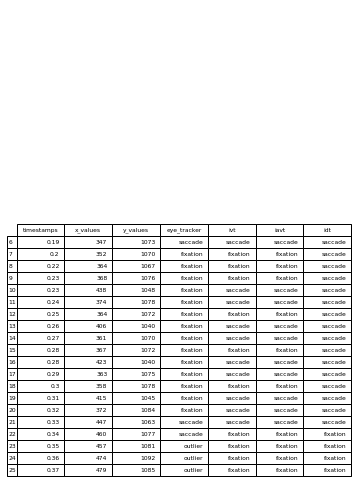

In [6]:
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, results_final.loc[6:25])  # where df is your data frame

plt.savefig('results_table_alt.png')

In [7]:
dfi.export(results_final,"results_table.png")

In [8]:
eye_t = results['eye_tracker']
i_vt = results['ivt']
i_avt = results['iavt']
i_dt = results['idt']

print(eye_t[3])
print(i_vt[3])
print(i_avt[3])
print(i_dt[3])

outlier
fixation
fixation
saccade


In [29]:
all_acc = []
all_pre = []
all_rec = []

def calc_res(algo,name):

    comp = sklearn.metrics.confusion_matrix(eye_t, algo)
    
    print(comp)

    comp_matrix = pd.DataFrame(comp,
            index = ['fixation','outlier','saccade'], 
            columns = ['fixation','outlier','saccade'])

    plt.figure(figsize=(5,4))
    sns.heatmap(comp_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Eye-tracker')
    plt.xlabel('Results')
    plt.savefig(name + "_confusion.png")
    plt.show()

    FN_tot = comp[0][1] + comp[0][2] + comp[1][0] + comp[1][2] + comp[2][0] + comp[2][1]
    FP_tot = comp[1][0] + comp[2][0] + comp[0][1] + comp[2][1] + comp[0][2] + comp[1][2]
    TN_tot = comp[1][1]*2 + comp[1][2] + comp[2][1] + comp[2][2]*2 + comp[0][0]*2 + comp[0][2] + comp[2][0] + comp[0][1] + comp[1][0]
    TP_tot = comp[0][0] + comp[1][1] + comp[2][2]

    all_acc.append((TP_tot + TN_tot)/(TP_tot + TN_tot + FP_tot + FN_tot))
    all_pre.append((TP_tot)/(TP_tot + FP_tot))
    all_rec.append((TP_tot)/(TP_tot + FN_tot))


In [35]:
all_acc = []
all_pre = []
all_rec = []

def calc_res(algo,name):

    comp = sklearn.metrics.classification_report(eye_t, algo)
    
    print(comp)
    

In [ ]:


    comp_matrix = pd.DataFrame(comp,
            index = ['fixation','outlier','saccade'], 
            columns = ['fixation','outlier','saccade'])

    plt.figure(figsize=(5,4))
    sns.heatmap(comp_matrix, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.ylabel('Eye-tracker')
    plt.xlabel('Results')
    plt.savefig(name + "_confusion.png")
    plt.show()

    FN_tot = comp[0][1] + comp[0][2] + comp[1][0] + comp[1][2] + comp[2][0] + comp[2][1]
    FP_tot = comp[1][0] + comp[2][0] + comp[0][1] + comp[2][1] + comp[0][2] + comp[1][2]
    TN_tot = comp[1][1]*2 + comp[1][2] + comp[2][1] + comp[2][2]*2 + comp[0][0]*2 + comp[0][2] + comp[2][0] + comp[0][1] + comp[1][0]
    TP_tot = comp[0][0] + comp[1][1] + comp[2][2]

    all_acc.append((TP_tot + TN_tot)/(TP_tot + TN_tot + FP_tot + FN_tot))
    all_pre.append((TP_tot)/(TP_tot + FP_tot))
    all_rec.append((TP_tot)/(TP_tot + FN_tot))

In [36]:
calc_res(i_vt,"ivt")
calc_res(i_avt,"iavt")
calc_res(i_dt,"idt")

              precision    recall  f1-score   support

    fixation       0.72      0.85      0.78     24929
     outlier       0.25      0.00      0.00      5859
     saccade       0.48      0.54      0.51      9375

    accuracy                           0.66     40163
   macro avg       0.48      0.46      0.43     40163
weighted avg       0.59      0.66      0.60     40163



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    fixation       0.70      0.86      0.77     24929
     outlier       0.00      0.00      0.00      5859
     saccade       0.47      0.48      0.47      9375

    accuracy                           0.65     40163
   macro avg       0.39      0.45      0.42     40163
weighted avg       0.55      0.65      0.59     40163



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    fixation       0.74      0.87      0.80     24929
     outlier       0.00      0.00      0.00      5859
     saccade       0.47      0.54      0.50      9375

    accuracy                           0.67     40163
   macro avg       0.40      0.47      0.44     40163
weighted avg       0.57      0.67      0.62     40163



c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
print(all_acc)
print(all_pre)
print(all_rec)

[]
[]
[]


In [2]:
class_rep = pd.read_csv("text_results/report.csv")
print(class_rep)
dfi.export(class_rep,"class_table.png")

         Unnamed: 0      I-VT     I-AVT      I-DT
0  Hamming Distance  13835.00  14192.00  13319.00
1          Accuracy      0.66      0.65      0.67
2         Precision      0.48      0.39      0.40
3            Recall      0.47      0.45      0.47
4         F-1 Score      0.43      0.42      0.44
